In [1]:
#############################################################################################
# Description:
# In this file we want to apply a neural network to the wine dataset
# The goal is to predict the wine quality as accurately as possible
#
#############################################################################################

# Install keras in case you don't have it yet
# Keras is used to run the neural net
!pip install keras

# This install is needed for some nice output of the neural net
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
# Import all relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
# Import both the red and white wine dataset
# IMPORTANT: the folder "data" containing both tables should be in the same folder as the current file
dataset_red = pd.read_csv('data/dataset_red.csv', index_col = 0)
dataset_white = pd.read_csv('data/dataset_white.csv', index_col = 0)

In [4]:
# Look at the head of dataset of red wine to check whether everything looks okay
dataset_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Look at the head of dataset of white wine to check whether everything looks okay
dataset_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
# Split the data into two parts, one for training (80%), and one for testing (20%)
# Red wine:
train_red = dataset_red.sample(frac=0.8,random_state=42)
test_red = dataset_red.drop(train_red.index)

# White wine:
train_white = dataset_white.sample(frac=0.8,random_state=42)
test_white = dataset_white.drop(train_white.index)

In [7]:
# Get descriptive statistics for the red wine dataset
train_stats_red = train_red.describe()
train_stats_red.pop("quality")
train_stats_red = train_stats_red.transpose()

# Get descriptive statistics for the white wine dataset
train_stats_white = train_white.describe()
train_stats_white.pop("quality")
train_stats_white = train_stats_white.transpose()

In [8]:
# Remove the outcome variable
train_labels_red = train_red.pop('quality')
test_labels_red = test_red.pop('quality')

train_labels_white = train_white.pop('quality')
test_labels_white = test_white.pop('quality')

In [9]:
# Define a function for normalizing the data
# Normalizing is done by substracting the mean and then dividing by the standard deviation
def norm(x, mean, std):
  return (x - mean) / std

In [10]:
# Normalize the red wine data
normed_train_red = norm(train_red, train_stats_red['mean'], train_stats_red['std'])
normed_test_red = norm(test_red, train_stats_red['mean'], train_stats_red['std'])

# Normalize the white wine data
normed_train_white = norm(train_white, train_stats_white['mean'], train_stats_white['std'])
normed_test_white = norm(test_white, train_stats_white['mean'], train_stats_white['std'])

In [11]:
# Define the neural net model
# Our neural network contains of three layers:
# layer 1: 64 nodes of relu activation functions
# layer 2: 64 nodes of relu acitvation functions
# layer 3: 10 modes of sigmoid activation functions
# This is then condensed into a single number
#
# The neural network tries to minimize the mean square error (mse)
def build_model(train):
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.0001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [12]:
# Create the model for the red wine data
model_red = build_model(train_red)

# Create the model for the red wine data
model_white = build_model(train_white)

In [13]:
# Print summary for the red wine model
model_red.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Print summary for the white wine model
model_white.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


In [15]:
# We set the number of epochs to 2000, epochs are the number of times the training data is fed into the neural net
EPOCHS = 2000

# Fit the training data to the model and store it in history
history = model_red.fit(
  normed_train_red, train_labels_red,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:27.3794,  mae:5.1622,  mse:27.3794,  val_loss:25.5080,  val_mae:4.9735,  val_mse:25.5080,  
....................................................................................................
Epoch: 100, loss:0.3569,  mae:0.4722,  mse:0.3569,  val_loss:0.5573,  val_mae:0.5630,  val_mse:0.5573,  
....................................................................................................
Epoch: 200, loss:0.2439,  mae:0.3839,  mse:0.2439,  val_loss:0.5092,  val_mae:0.5371,  val_mse:0.5092,  
....................................................................................................
Epoch: 300, loss:0.1908,  mae:0.3353,  mse:0.1908,  val_loss:0.5050,  val_mae:0.5234,  val_mse:0.5050,  
....................................................................................................
Epoch: 400, loss:0.1517,  mae:0.2942,  mse:0.1517,  val_loss:0.5161,  val_mae:0.5213,  val_mse:0.5161,  
....................................................................

In [16]:
# The head of the history of the data frame
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

# As we can see, the improvement is quite substantial in the beginning

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,27.379402,5.162210,27.379402,25.507965,4.973484,25.507965,0
1,23.575451,4.774714,23.575451,21.987358,4.596600,21.987358,1
2,19.673311,4.336504,19.673311,18.282534,4.155677,18.282534,2
3,15.733317,3.830410,15.733317,14.570529,3.668596,14.570529,3
4,11.897468,3.268723,11.897468,10.995053,3.125371,10.995053,4


Text(0, 0.5, 'MSE [quality]')

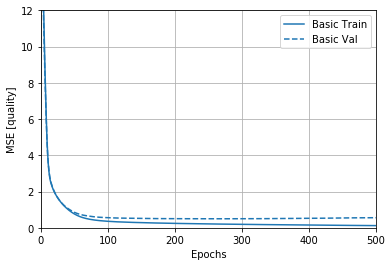

In [17]:
# Plot the improvement of the MSE over the first 500 epochs
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 12])
plt.xlim([0, 500])
plt.ylabel('MSE [quality]')

In [18]:
# Print the results 
loss, mae, mse = model_red.evaluate(normed_test_red, test_labels_red, verbose=2)

print("Red wine:")
print("Testing set Mean Abs Error: {:5.2f} ".format(mae))
print("Testing set MSE: {:5.2f} ".format(mse))

10/10 - 0s - loss: 0.8600 - mae: 0.6187 - mse: 0.8600
Red wine:
Testing set Mean Abs Error:  0.62 
Testing set MSE:  0.86 


In [19]:
# Same as previously but now for the white wine
early_stop_white = keras.callbacks.EarlyStopping(monitor='val_mse', patience=50)

early_history_white = model_white.fit(normed_train_white, train_labels_white, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop_white, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:31.8431,  mae:5.5621,  mse:31.8431,  val_loss:24.9106,  val_mae:4.8849,  val_mse:24.9106,  
....................................................................................................
Epoch: 100, loss:0.3824,  mae:0.4833,  mse:0.3824,  val_loss:0.4912,  val_mae:0.5530,  val_mse:0.4912,  
....................................................................................................
Epoch: 200, loss:0.3067,  mae:0.4300,  mse:0.3067,  val_loss:0.4683,  val_mae:0.5322,  val_mse:0.4683,  
....................................................................................................
Epoch: 300, loss:0.2613,  mae:0.3940,  mse:0.2613,  val_loss:0.4635,  val_mae:0.5219,  val_mse:0.4635,  
.................................................

Text(0, 0.5, 'MSE [quality]')

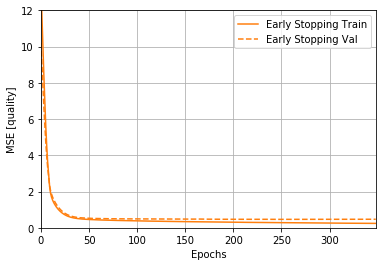

In [20]:
# Plot the improvement of MSE in all epochs until the early stopping
plotter.plot({'Early Stopping': early_history_white}, metric = "mse")
plt.ylim([0, 12])
plt.ylabel('MSE [quality]')

In [21]:
# Evaluate the loss, mae and mse of our model based on the training set
loss, mae, mse = model_white.evaluate(normed_test_white, test_labels_white, verbose=2)

# Print the results 
print("White wine:")
print("Testing set Mean Abs Error: {:5.2f} ".format(mae))
print("Testing set MSE: {:5.2f} ".format(mse))

31/31 - 0s - loss: 0.5103 - mae: 0.5423 - mse: 0.5103
White wine:
Testing set Mean Abs Error:  0.54 
Testing set MSE:  0.51 
